In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px

In [12]:
from statsmodels.graphics.mosaicplot import mosaic

import os
os.listdir(r"C:\Users\Admin\Downloads\Network Intrusion")

['2020', '2021']

In [14]:
os.listdir(r"C:\Users\Admin\Downloads\Network Intrusion\2020")

['06', '07', '08', '09', '10', '11', '12']

In [15]:
df_example = pd.read_csv(r"C:\Users\Admin\Downloads\Network Intrusion\2020\10\2020.10.01\2020.10.01.csv")
# first glance
df_example.head()

avg_ipt  bytes_in  bytes_out  dest_ip  dest_port   entropy  num_pkts_out  \
0      0.0         0      14480      786     9200.0  2.116894            10   
1      0.0         0       7240      786     9200.0  3.748675             5   
2      0.0         0      14480      786     9200.0  2.079622            10   
3      0.0         0      14480      786     9200.0  2.033979            10   
4      0.0         0      14480      786     9200.0  1.955485            10   

   num_pkts_in  proto  src_ip  src_port          time_end        time_start  \
0            0      6     786   43432.0  1601521393115058  1601521393114933   
1            0      6     786   43428.0  1601521393115613  1601521393115579   
2            0      6     786   43436.0  1601521393116141  1601521393115993   
3            0      6     786   43434.0  1601521393116629  1601521393116562   
4            0      6     786   43434.0  1601521393116743  1601521393116635   

   total_entropy   label  duration  
0      30652.621  benign  0.000125  
1      27140.404  benign  0.000034  
2      30112.930  benign  0.000148  
3      29452.021  benign  0.000067  
4      28315.428  benign  0.000108

### Explorations

In [16]:
# dimensions of data
df_example.shape

(1081952, 16)

In [17]:
# imputation of missings and conversion to int
df_example.dest_port = df_example.dest_port.fillna(-1).astype('int64')
df_example.src_port = df_example.src_port.fillna(-1).astype('int64')

In [18]:
# summary of numerical features
df_example.describe()

avg_ipt      bytes_in     bytes_out       dest_ip     dest_port  \
count  1.081952e+06  1.081952e+06  1.081952e+06  1.081952e+06  1.081952e+06   
mean   1.438714e+06  4.182185e+02  2.354654e+03  4.163730e+03  1.200858e+04   
std    4.090331e+07  2.085036e+03  5.891802e+03  2.054663e+04  1.663640e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00 -1.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  7.860000e+02  4.450000e+02   
50%    0.000000e+00  0.000000e+00  1.910000e+02  7.860000e+02  9.200000e+03   
75%    3.075000e+01  2.700000e+02  1.452000e+03  7.860000e+02  9.200000e+03   
max    4.294967e+09  6.456800e+04  6.553200e+04  3.987220e+05  6.553500e+04   

            entropy  num_pkts_out   num_pkts_in         proto        src_ip  \
count  1.081952e+06  1.081952e+06  1.081952e+06  1.081952e+06  1.081952e+06   
mean   3.048347e+00  5.344491e+00  3.058727e+00  6.432499e+00  2.008594e+04   
std    2.287969e+00  1.846022e+01  1.101436e+01  2.356546e+00  4.544084e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  3.000000e+00   
25%    0.000000e+00  1.000000e+00  0.000000e+00  6.000000e+00  7.860000e+02   
50%    3.762122e+00  2.000000e+00  1.000000e+00  6.000000e+00  7.860000e+02   
75%    4.726709e+00  6.000000e+00  2.000000e+00  6.000000e+00  1.797400e+04   
max    3.408484e+01  2.550000e+02  2.540000e+02  4.700000e+01  3.987220e+05   

           src_port      time_end    time_start  total_entropy      duration  
count  1.081952e+06  1.081952e+06  1.081952e+06   1.081952e+06  1.081952e+06  
mean   3.887982e+04  1.456847e+15  1.456233e+15   8.498996e+03  9.590423e-01  
std    2.011522e+04  4.357679e+14  4.365854e+14   1.762607e+04  4.219283e+00  
min   -1.000000e+00  1.601515e+10  1.601521e+10   0.000000e+00  0.000000e+00  
25%    2.494100e+04  1.601522e+15  1.601522e+15   0.000000e+00  0.000000e+00  
50%    4.343200e+04  1.601525e+15  1.601525e+15   2.105241e+03  1.690000e-04  
75%    5.366100e+04  1.601538e+15  1.601538e+15   1.241337e+04  1.267920e-01  
max    6.553500e+04  1.601597e+15  1.601597e+15   1.839968e+06  4.202127e+01

In [19]:
# init plot size
plt.rcParams['figure.figsize']=(7,4)

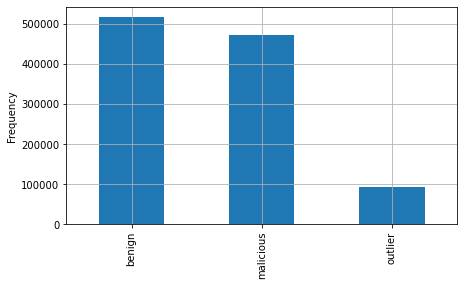

In [20]:
# label distribution
df_example.label.value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.grid()
plt.show()

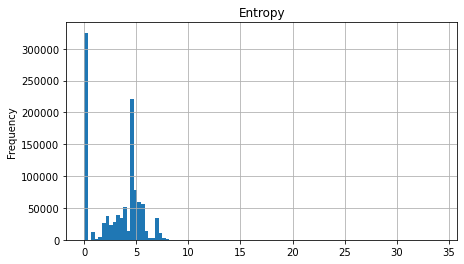

In [21]:
# entropy in bits per byte of the data fields within the flow; ranges from 0 to 8.
df_example.entropy.plot(kind='hist', bins=100)
plt.title('Entropy')
plt.grid()
plt.show()

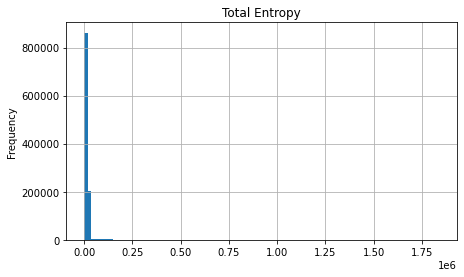

In [22]:
# total entropy in bytes over all of the bytes in the data fields of the flow
df_example.total_entropy.plot(kind='hist', bins=100)
plt.title('Total Entropy')
plt.grid()
plt.show()

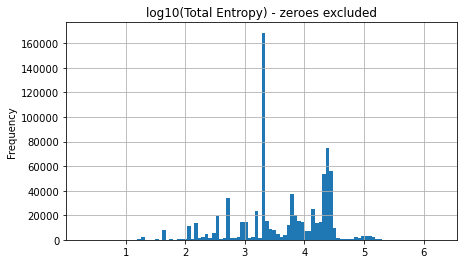

In [23]:
# look at non-zeroes only
total_entropy_pos = df_example.total_entropy[df_example.total_entropy>0]
# show log plot
plt.hist(np.log10(total_entropy_pos),100)
plt.ylabel('Frequency')
plt.title('log10(Total Entropy) - zeroes excluded')
plt.grid()
plt.show()

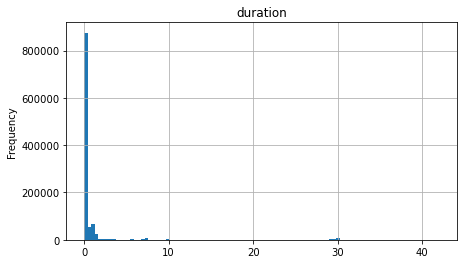

In [24]:
# flow duration time, with microsecond precision
df_example.duration.plot(kind='hist', bins=100)
plt.title('duration')
plt.grid()
plt.show()

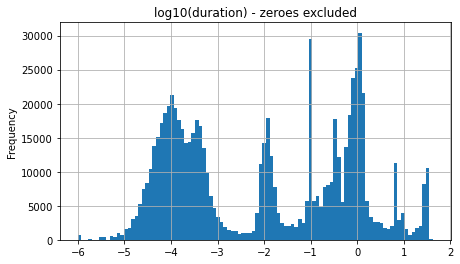

In [25]:
# look at non-zeroes only
duration_pos = df_example.duration[df_example.duration>0]
# show log plot
plt.hist(np.log10(duration_pos),100)
plt.ylabel('Frequency')
plt.title('log10(duration) - zeroes excluded')
plt.grid()
plt.show()

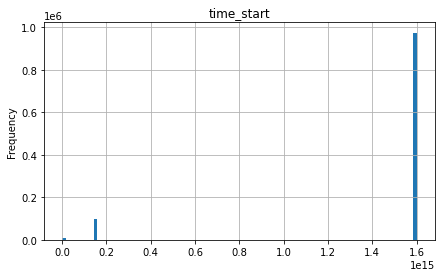

In [26]:
# start time of the flow in seconds since the epoch
df_example.time_start.plot(kind='hist', bins=100)
plt.title('time_start')
plt.grid()
plt.show()

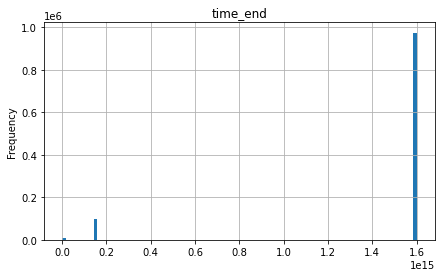

In [27]:
# end time of the flow in seconds since the epoch
df_example.time_end.plot(kind='hist', bins=100)
plt.title('time_end')
plt.grid()
plt.show()

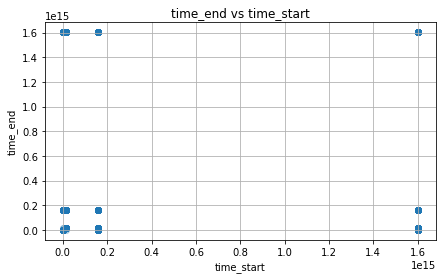

In [28]:
# 2D plot of start and end time
plt.scatter(df_example.time_start, df_example.time_end, alpha=0.1)
plt.xlabel('time_start')
plt.ylabel('time_end')
plt.title('time_end vs time_start')
plt.grid()
plt.show()

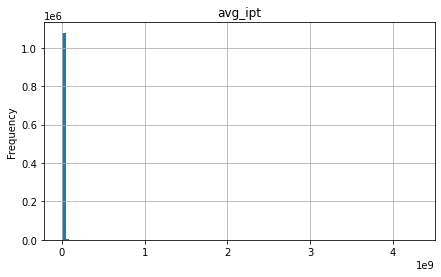

In [29]:
# mean of the inter-packet arrival times of the flow (in description called "mean_ipt")
df_example.avg_ipt.plot(kind='hist', bins=100)
plt.title('avg_ipt')
plt.grid()
plt.show()

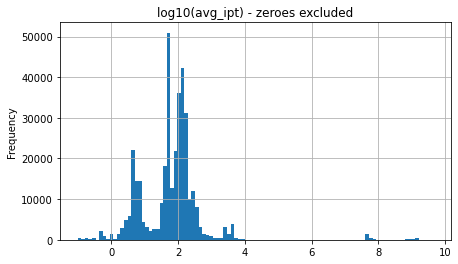

In [30]:
# look at non-zeroes only
avg_ipt_pos = df_example.avg_ipt[df_example.avg_ipt>0]
# show log plot
plt.hist(np.log10(avg_ipt_pos),100)
plt.ylabel('Frequency')
plt.title('log10(avg_ipt) - zeroes excluded')
plt.grid()
plt.show()

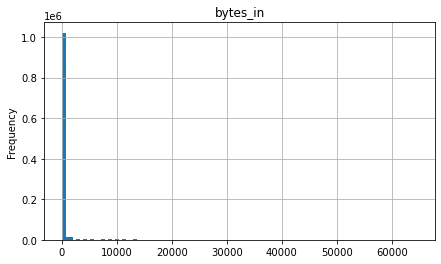

In [31]:
# number of bytes transmitted from source to destination
df_example.bytes_in.plot(kind='hist', bins=100)
plt.title('bytes_in')
plt.grid()
plt.show()

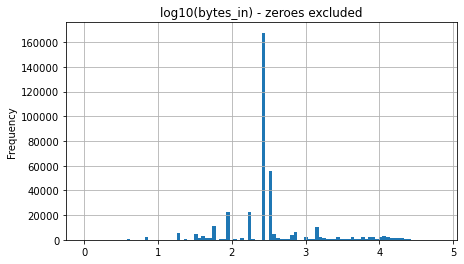

In [32]:
# look at non-zeroes only
bytes_in_pos = df_example.bytes_in[df_example.bytes_in>0]
# show log plot
plt.hist(np.log10(bytes_in_pos),100)
plt.ylabel('Frequency')
plt.title('log10(bytes_in) - zeroes excluded')
plt.grid()
plt.show()



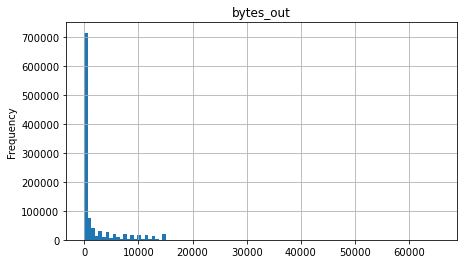

In [33]:
# number of bytes transmitted from destination to source.
df_example.bytes_out.plot(kind='hist', bins=100)
plt.title('bytes_out')
plt.grid()
plt.show()

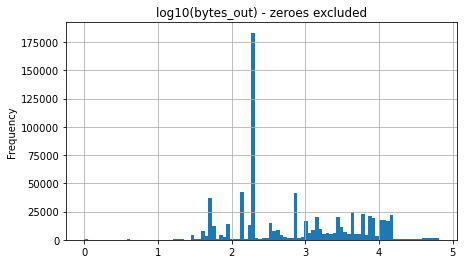

In [34]:
# look at non-zeroes only
bytes_out_pos = df_example.bytes_out[df_example.bytes_out>0]
# show log plot
plt.hist(np.log10(bytes_out_pos),100)
plt.ylabel('Frequency')
plt.title('log10(bytes_out) - zeroes excluded')
plt.grid()
plt.show()

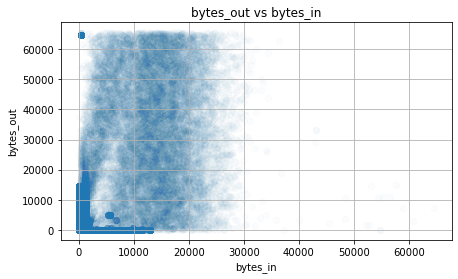

In [35]:
# 2D plot of bytes in / out
plt.scatter(df_example.bytes_in, df_example.bytes_out, alpha=0.02)
plt.xlabel('bytes_in')
plt.ylabel('bytes_out')
plt.title('bytes_out vs bytes_in')
plt.grid()
plt.show()

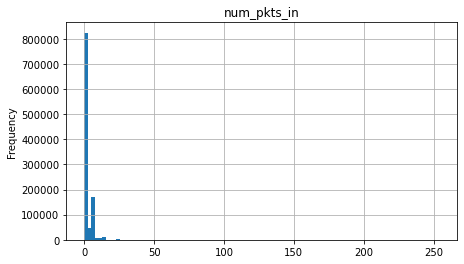

In [36]:
# packet count from source to destination
df_example.num_pkts_in.plot(kind='hist', bins=100)
plt.title('num_pkts_in')
plt.grid()
plt.show()

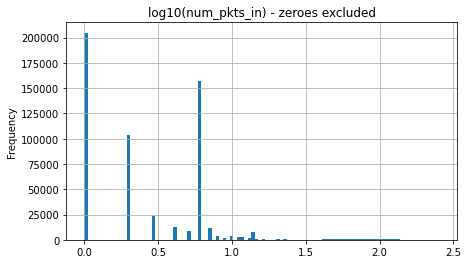

In [37]:
# look at non-zeroes only
num_pkts_in_pos = df_example.num_pkts_in[df_example.num_pkts_in>0]
# show log plot
plt.hist(np.log10(num_pkts_in_pos),100)
plt.ylabel('Frequency')
plt.title('log10(num_pkts_in) - zeroes excluded')
plt.grid()
plt.show()

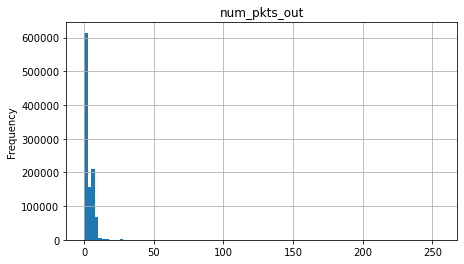

In [38]:
# packet count from destination to source
df_example.num_pkts_out.plot(kind='hist', bins=100)
plt.title('num_pkts_out')
plt.grid()
plt.show()

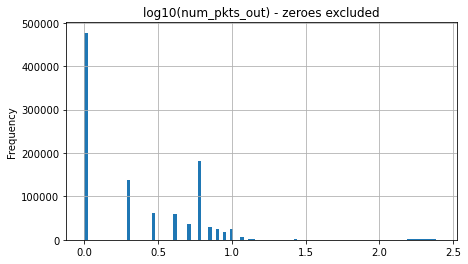

In [39]:
# look at non-zeroes only
num_pkts_out_pos = df_example.num_pkts_out[df_example.num_pkts_out>0]
# show log plot
plt.hist(np.log10(num_pkts_out_pos),100)
plt.ylabel('Frequency')
plt.title('log10(num_pkts_out) - zeroes excluded')
plt.grid()
plt.show()

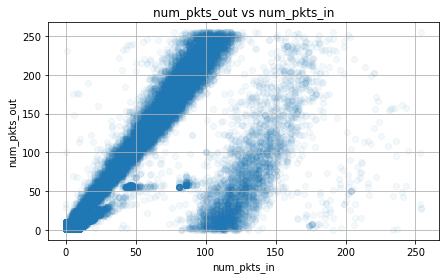

In [40]:
# 2D plot of packets in / out
plt.scatter(df_example.num_pkts_in, df_example.num_pkts_out, alpha=0.05)
plt.xlabel('num_pkts_in')
plt.ylabel('num_pkts_out')
plt.title('num_pkts_out vs num_pkts_in')
plt.grid()
plt.show()

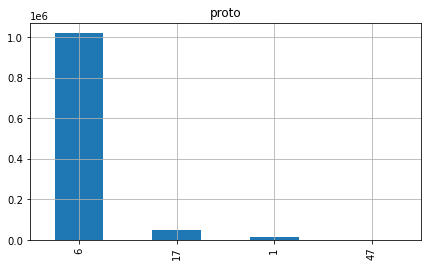

In [41]:
# protocol number associated with the flow; e. g. TCP is 6
df_example.proto.value_counts().plot(kind='bar')
plt.title('proto')
plt.grid()
plt.show()

In [42]:
# check impact of protocol on target
pd.crosstab(df_example.proto, df_example.label)

label  benign  malicious  outlier
proto                            
1           0      12831      431
6      510237     417293    92597
17       6756      41351      454
47          0          1        1

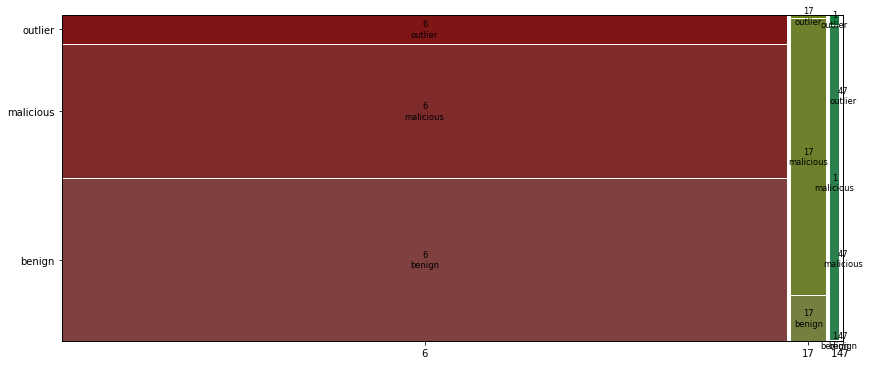

In [43]:
# graphical version: mosaic plot
rcpar_save = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize']=(14,6)
mosaic(df_example, ['proto','label'])
plt.show()

plt.rcParams['figure.figsize'] = rcpar_save # reset plot size to previous status

In [44]:
# source IP (anonymized)
df_example.src_ip.value_counts()

786       591446
45899      53877
16276      38551
7552       28109
18403      19854
           ...  
62000          1
64050          1
134765         1
43205          1
39608          1
Name: src_ip, Length: 642, dtype: int64

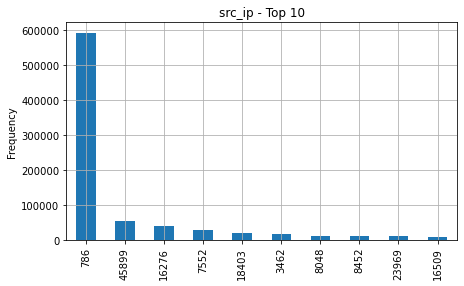

In [45]:
# source IP plot
df_example.src_ip.value_counts()[0:10].plot(kind='bar')
plt.ylabel('Frequency')
plt.title('src_ip - Top 10')
plt.grid()
plt.show()

In [46]:
# destination IP (anonymized)
df_example.dest_ip.value_counts()

786       992152
18403      18277
15169      15274
45899       8580
7552        3333
           ...  
2500           1
262470         1
43513          1
47610          1
262272         1
Name: dest_ip, Length: 276, dtype: int64

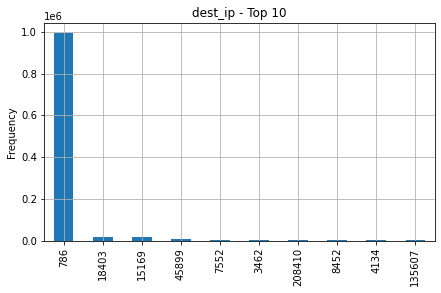

In [47]:
# destination IP plot
df_example.dest_ip.value_counts()[0:10].plot(kind='bar')
plt.ylabel('Frequency')
plt.title('dest_ip - Top 10')
plt.grid()
plt.show()

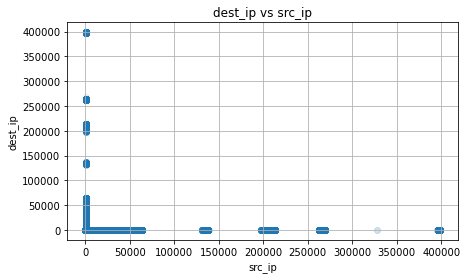

In [48]:
# destination IP vs source IP
plt.scatter(df_example.src_ip, df_example.dest_ip, alpha=0.1)
plt.xlabel('src_ip')
plt.ylabel('dest_ip')
plt.title('dest_ip vs src_ip')
plt.grid()
plt.show()

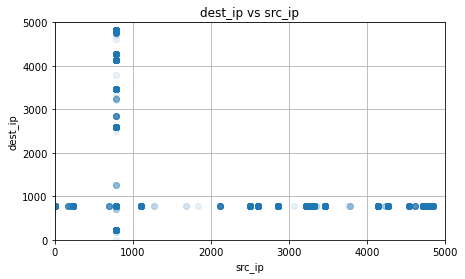

In [49]:
# zoom in
plt.scatter(df_example.src_ip, df_example.dest_ip, alpha=0.1)
plt.xlim(0,5000)
plt.ylim(0,5000)
plt.xlabel('src_ip')
plt.ylabel('dest_ip')
plt.title('dest_ip vs src_ip')
plt.grid()
plt.show()

In [50]:
# most frequent IP pairs
df_example['IP_pair'] = df_example.src_ip.astype(str) + ' >> ' + df_example.dest_ip.astype(str)
df_example.IP_pair.value_counts()[0:20]

786 >> 786       501646
45899 >> 786      53877
16276 >> 786      38551
7552 >> 786       28109
18403 >> 786      19854
786 >> 18403      18277
3462 >> 786       16361
786 >> 15169      15274
8048 >> 786       12313
8452 >> 786       10979
23969 >> 786      10682
16509 >> 786       9645
786 >> 45899       8580
137697 >> 786      7359
12389 >> 786       7311
4134 >> 786        6578
213371 >> 786      6194
17552 >> 786       5969
50010 >> 786       5919
9198 >> 786        5775
Name: IP_pair, dtype: int64

In [51]:
# interactive treemap visualization of source/destination IP
fig = px.treemap(df_example, path=['src_ip','dest_ip'], title='Source IP => Destination IP',
                 width=1000, height=800)
fig.show()

In [52]:
# source port
df_example.src_port.value_counts()

9200     128225
445       58489
43408     45329
43428     44302
43430     44155
          ...  
45507         1
2516          1
25049         1
20959         1
2049          1
Name: src_port, Length: 51958, dtype: int64

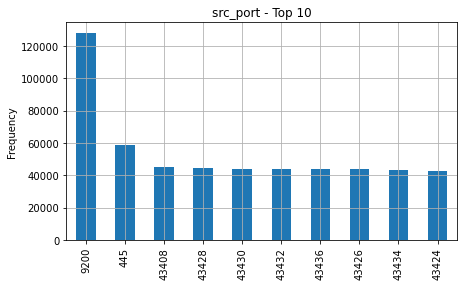

In [53]:
# source port plot
df_example.src_port.value_counts().iloc[0:10].plot(kind='bar')
plt.ylabel('Frequency')
plt.title('src_port - Top 10')
plt.grid()
plt.show()

In [54]:
# destination port
df_example.dest_port.value_counts()

9200     366702
445      366401
5060      40108
22        22747
43408     16354
          ...  
35219         1
15145         1
10631         1
50585         1
8188          1
Name: dest_port, Length: 29660, dtype: int64

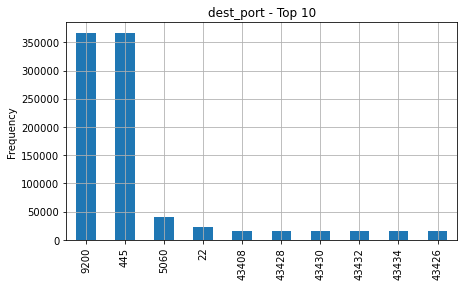

In [55]:
# destination port plot
df_example.dest_port.value_counts().iloc[0:10].plot(kind='bar')
plt.ylabel('Frequency')
plt.title('dest_port - Top 10')
plt.grid()
plt.show()

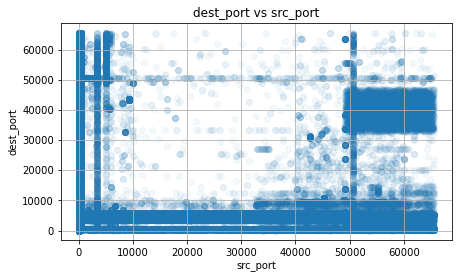

In [56]:
# destination port vs source port
plt.scatter(df_example.src_port, df_example.dest_port, alpha=0.05)
plt.xlabel('src_port')
plt.ylabel('dest_port')
plt.title('dest_port vs src_port')
plt.grid()
plt.show()

In [57]:
# most frequent port pairs
df_example['port_pair'] = df_example.src_port.astype(str) + ' >> ' + df_example.dest_port.astype(str)
df_example.port_pair.value_counts()[0:20]

43408 >> 9200    45323
43428 >> 9200    44296
43430 >> 9200    44153
43432 >> 9200    44038
43436 >> 9200    44019
43426 >> 9200    43901
43434 >> 9200    43476
43424 >> 9200    42964
9200 >> 43408    16354
9200 >> 43428    16237
9200 >> 43430    16120
9200 >> 43432    16051
9200 >> 43426    15960
9200 >> 43434    15957
9200 >> 43436    15860
9200 >> 43424    15676
-1 >> -1         13264
53318 >> 9200     3127
53314 >> 9200     3117
53316 >> 9200     3116
Name: port_pair, dtype: int64

### Fit a predictive model

In [58]:
# select features
features = df_example.columns
features = features.drop(['label'])
features = list(features)
print(features)

['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy', 'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port', 'time_end', 'time_start', 'total_entropy', 'duration', 'IP_pair', 'port_pair']


In [60]:
!pip install h2o

  Created wheel for h2o: filename=h2o-3.32.1.7-py2.py3-none-any.whl size=170040345 sha256=7aadf0df5ab2590a749b595ab8801cdf81982f6967d1721991b6ac77ea1e2df8
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\75\91\85\74a204898a6de735643eb0500527bec550c04adbda331158f1
Successfully built h2o


In [70]:
# start H2O
import h2o
from h2o.estimators import H2ORandomForestEstimator

h2o.init(max_mem_size='6G', nthreads=4)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.12+8-LTS-237, mixed mode)
  Starting server from C:\Users\Admin\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Admin\AppData\Local\Temp\tmpkumv7kam
  JVM stdout: C:\Users\Admin\AppData\Local\Temp\tmpkumv7kam\h2o_Admin_started_from_python.out
  JVM stderr: C:\Users\Admin\AppData\Local\Temp\tmpkumv7kam\h2o_Admin_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ---------------------------------------------------------
H2O_cluster_uptime:         33 secs
H2O_cluster_timezone:       Africa/Nairobi
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.32.1.7
H2O_cluster_version_age:    7 days, 18 hours and 32 minutes
H2O_cluster_name:           H2O_from_python_Admin_pbxdya
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    0
H2O_cluster_allowed_cores:  0
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.8.5 final
--------------------------  ---------------------------------------------------------

In [71]:
# upload data frame in H2O environment
t1 = time.time()
df_hex = h2o.H2OFrame(df_example)
t2 = time.time()
print('Elapsed time [s]: ', np.round(t2-t1,2))

Parse progress: |█████████████████████████████████████████████████████████| 100%
Elapsed time [s]:  171.23


In [72]:
# define target
target = 'label'
# explicitly convert target to categorical => classification problem
df_hex[target] = df_hex[target].asfactor()

In [73]:
# train / test split (80/20)
train_hex, test_hex = df_hex.split_frame(ratios=[0.8], seed=999)

In [74]:
# define (distributed) random forest model
fit_DRF = H2ORandomForestEstimator(ntrees=10,
                                   max_depth=5,
                                   min_rows=10,
                                   nfolds=5,
                                   seed=999)

In [75]:
# train model
t1 = time.time()
fit_DRF.train(x=features,
              y=target,
              training_frame=train_hex)
t2 = time.time()
print('Elapsed time [s]: ', np.round(t2-t1,2))

drf Model Build progress: |███████████████████████████████████████████████| 100%
Elapsed time [s]:  59.28


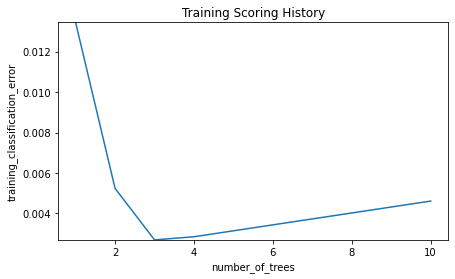

In [76]:
# show training scoring history
fit_DRF.plot()

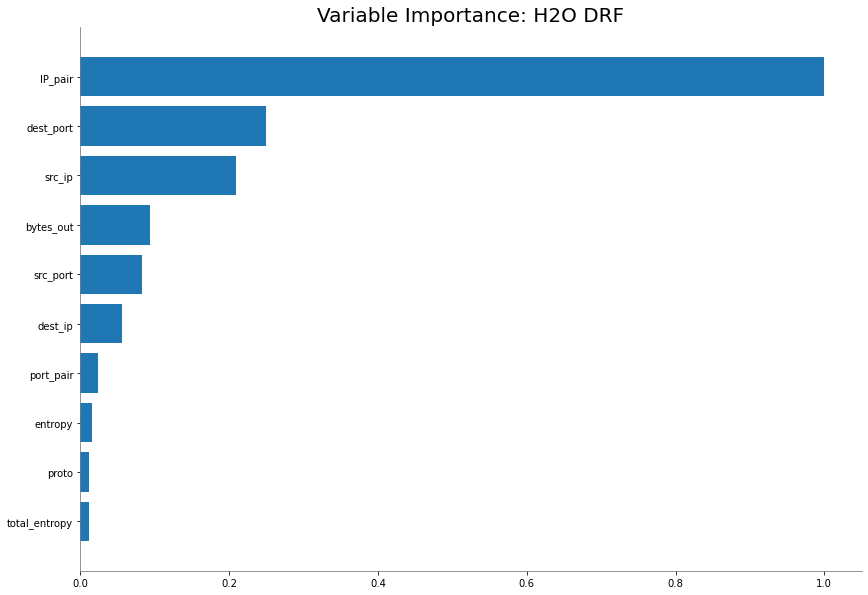

In [77]:
# variable importance
fit_DRF.varimp_plot()

In [78]:
# performance on training
perf_train = fit_DRF.model_performance(train=True)
perf_train


ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.00828900222051744
RMSE: 0.09104395762771651
LogLoss: 0.04490425805471307
Mean Per-Class Error: 0.016687015945657104
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


benign  malicious  outlier     Error             Rate
0  409166.0      101.0      5.0  0.000259    106 / 409,272
1     133.0   372884.0     59.0  0.000515    192 / 373,076
2      18.0     3634.0  70444.0  0.049287   3,652 / 74,096
3  409317.0   376619.0  70508.0  0.004612  3,950 / 856,444


Top-3 Hit Ratios: 


k  hit_ratio
0  1   0.995388
1  2   0.999919
2  3   1.000000

In [79]:
# cross validation metrics
fit_DRF.cross_validation_metrics_summary()


Cross-Validation Metrics Summary: 


mean            sd    cv_1_valid  \
0                  accuracy     0.9996199  1.4934083E-4     0.9995547   
1                       auc           NaN           0.0           NaN   
2                       err   3.801214E-4  1.4934083E-4  4.4527717E-4   
3                 err_count          65.8     25.820534          77.0   
4                   logloss   0.044420037  0.0015460032   0.044766143   
5       max_per_class_error  0.0034458057  0.0017701992  0.0038474295   
6   mean_per_class_accuracy    0.99879354   5.854098E-4     0.9986401   
7      mean_per_class_error   0.001206447   5.854098E-4  0.0013598939   
8                       mse  0.0061502084  4.0287487E-4  0.0063612675   
9                    pr_auc           NaN           0.0           NaN   
10                       r2    0.98504645  9.4168045E-4    0.98457646   
11                     rmse     0.0783892  0.0025840965    0.07975756   

      cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid  
0     0.99950355     0.9997747     0.9994797     0.9997867  
1            NaN           NaN           NaN           NaN  
2   4.9642974E-4  2.2528377E-4  5.2028237E-4  2.1333394E-4  
3           86.0          39.0          90.0          37.0  
4     0.04458454    0.04654433     0.0422571   0.043948077  
5    0.005235255  0.0013338669   0.004940444  0.0018720331  
6     0.99822634    0.99947774    0.99828416     0.9993394  
7   0.0017736652  5.2223424E-4  0.0017158213  6.6062034E-4  
8    0.006169839   0.006640176  0.0055612316   0.006018529  
9            NaN           NaN           NaN           NaN  
10     0.9850352     0.9838695     0.9864075    0.98534346  
11    0.07854832   0.081487276   0.074573666    0.07757918

In [80]:
pred_test = fit_DRF.predict(test_hex)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [81]:
# add actual target
pred_test['target'] = test_hex['label']
# and convert to pandas data frame
pred_test = pred_test.as_data_frame()

In [82]:
# show a few examples, the 3 numeric values are the predicted probabilities for the 3 classes
pred_test.tail(10)

predict        benign  malicious   outlier     target
216244  malicious  2.811451e-05   0.960361  0.039610  malicious
216245  malicious  0.000000e+00   0.999817  0.000183  malicious
216246  malicious  4.188829e-07   0.999996  0.000003  malicious
216247  malicious  2.855797e-05   0.907556  0.092415  malicious
216248  malicious  4.188829e-07   0.999996  0.000003  malicious
216249  malicious  4.953982e-07   0.976200  0.023799  malicious
216250  malicious  4.188829e-07   0.999996  0.000003  malicious
216251     benign  9.499847e-01   0.050012  0.000003     benign
216252  malicious  2.815577e-05   0.992288  0.007684  malicious
216253  malicious  4.188829e-07   0.999996  0.000003  malicious

In [83]:
# evaluate confusion matrix
pd.crosstab(pred_test.predict, pred_test.target)

target     benign  malicious  outlier
predict                              
benign     103231          0        4
malicious      14      94416       81
outlier         0          2    18506